# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [17]:
#maulana sandy

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [19]:
dataframe = pd.read_csv('Customers.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#***1. Memahami Struktur Data***

In [20]:
print("Dataset Info:")
print(dataframe.info())

print("Initial Rows:")
print(dataframe.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None
Initial Rows:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6 

#***2. Menangani Data yang Hilang***

In [21]:
# Handling Missing Values
dataframe.dropna(inplace=True)

#***3 dan 4 Analisis Distribusi dan Korelasi dan Visualisasi Data***

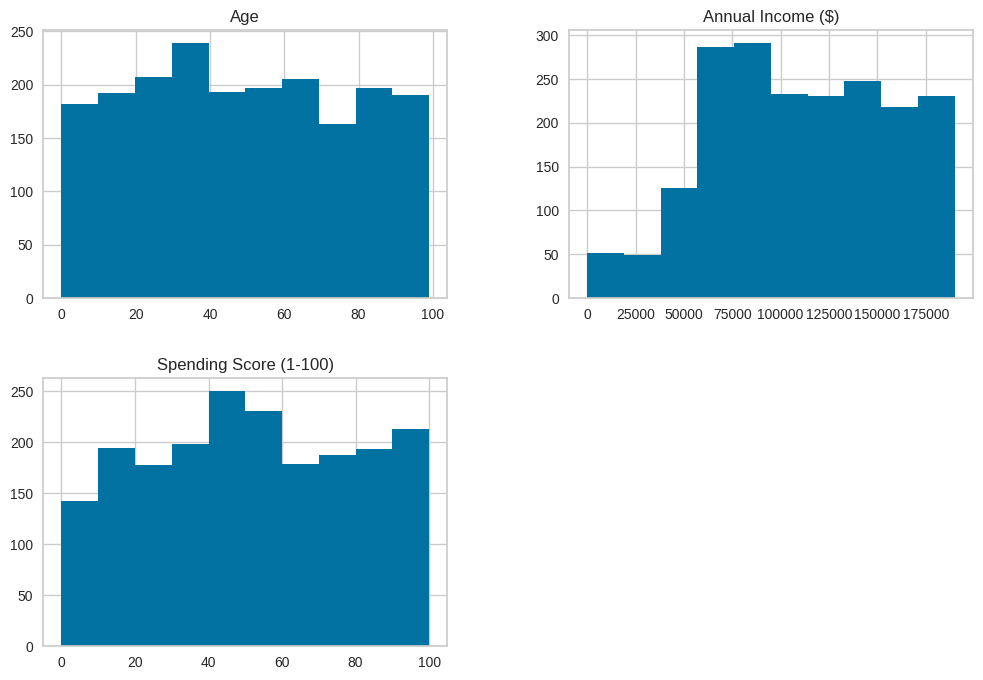

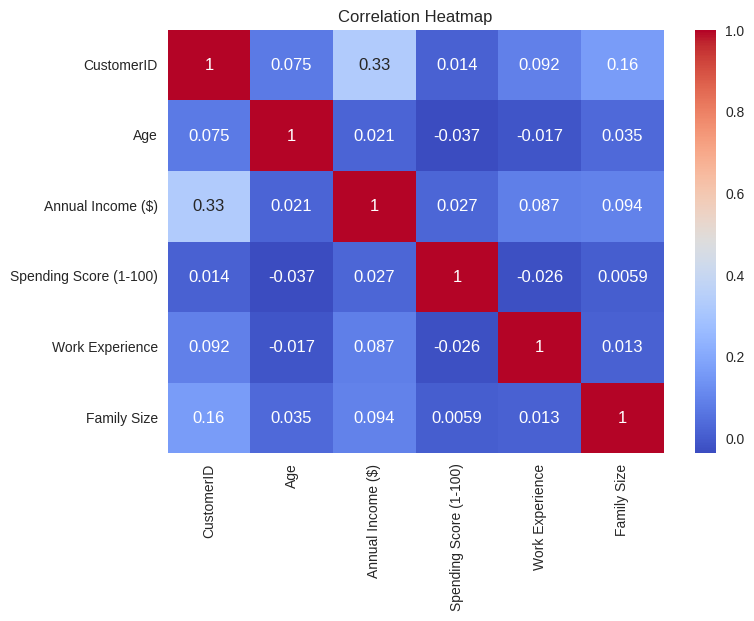

In [22]:
def plot_distribution(data, features):
    data[features].hist(figsize=(12, 8))
    plt.show()

plot_distribution(dataframe, ['Age', 'Annual Income ($)', 'Spending Score (1-100)'])

sns.heatmap(dataframe.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [23]:
encoder = LabelEncoder()
dataframe['Gender'] = encoder.fit_transform(dataframe['Gender'])
dataframe['Profession'] = encoder.fit_transform(dataframe['Profession'])

In [24]:
scaling_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
scaler = StandardScaler()
dataframe[scaling_columns] = scaler.fit_transform(dataframe[scaling_columns])
dataframe.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,-1.052345,-2.086675,-0.431850,5,1,4
1,2,1,-0.981941,-1.650205,1.069755,2,3,3
2,3,0,-1.017143,-0.537207,-1.611684,2,1,1
3,4,0,-0.911538,-1.126441,0.926745,7,0,2
4,5,0,-0.629924,-1.584734,-0.396098,3,2,6


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [25]:
def train_kmeans(data, clusters=3):
    model = KMeans(n_clusters=clusters, random_state=42)
    model.fit(data)
    return model

cluster_model = train_kmeans(dataframe, clusters=4)
dataframe['ClusterGroup'] = cluster_model.labels_

In [26]:
# Dekode data kategori yang telah di-encode
dataframe['Gender'] = encoder.inverse_transform(dataframe['Gender'])
dataframe['Profession'] = encoder.inverse_transform(dataframe['Profession'])

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [27]:
numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
numeric_data = dataframe[numeric_columns]

In [28]:
# Hitung Silhouette Score
sil_score = silhouette_score(numeric_data, cluster_model.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5708694533595058


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

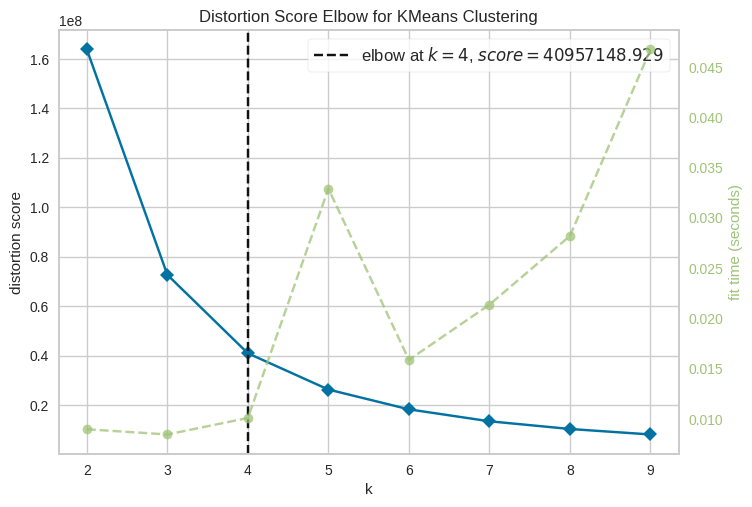

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Gunakan data numerik untuk visualisasi elbow
elbow_visual = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
elbow_visual.fit(numeric_data)
elbow_visual.show()

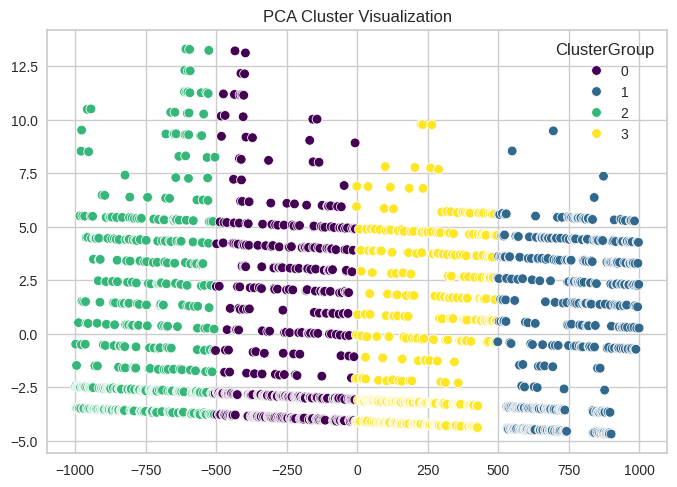

In [30]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_data)
# Visualisasi PCA
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=dataframe['ClusterGroup'], palette='viridis')
plt.title('PCA Cluster Visualization')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [31]:
for cluster_label in dataframe['ClusterGroup'].unique():
    cluster_data = dataframe[dataframe['ClusterGroup'] == cluster_label]
    print(f"\nKarakteristik Cluster {cluster_label}:")
    print(cluster_data.describe())  # Statistik deskriptif
    # Analisis lebih lanjut dapat dilakukan pada kolom spesifik, misal:
    print(f"Rata-rata annual income di cluster {cluster_label}: {cluster_data['Annual Income ($)'].mean()}")



Karakteristik Cluster 2:
       CustomerID         Age  Annual Income ($)  Spending Score (1-100)  \
count  490.000000  490.000000         490.000000              490.000000   
mean   248.408163   -0.136811          -0.663206                0.005498   
std    143.357094    0.874332           1.060214                1.002599   
min      1.000000   -1.721179          -2.414027               -1.826199   
25%    125.250000   -0.805933          -1.448338               -0.789376   
50%    249.500000   -0.313108          -0.799089               -0.002820   
75%    371.750000    0.531735          -0.086421                0.855240   
max    496.000000    1.763797           1.704479                1.749053   

       Work Experience  Family Size  ClusterGroup  
count       490.000000   490.000000         490.0  
mean          4.112245     3.046939           2.0  
std           4.266392     1.678640           0.0  
min           0.000000     1.000000           2.0  
25%           1.000000     2.

**Cluster 0**

Karakteristik Utama:

1. Annual Income : Rata-rata positif (0.211), mengindikasikan kelompok ini memiliki penghasilan tahunan yang lebih tinggi dibanding Cluster 2, tetapi masih lebih rendah dari Cluster 1.
2. Age: Rata-rata usia mendekati nol (-0.014), menunjukkan distribusi usia yang merata, tanpa dominasi kelompok usia tertentu.
3. Spending Score: Rata-rata sedikit negatif (-0.050), mencerminkan kebiasaan belanja yang hemat atau konservatif.
4. Family Size: Rata-rata 3.92, mengindikasikan keluarga dengan anggota yang cukup banyak, lebih besar dibanding Cluster 2.
5. Work Experience: Rata-rata rendah (3.83 tahun), menunjukkan mayoritas kelompok ini terdiri dari pekerja dengan pengalaman terbatas.

**Distribusi Data:**
Distribusi usia di cluster ini menunjukkan keseimbangan antara individu muda dan dewasa, sementara distribusi pengeluaran cenderung rendah (konservatif).
Ukuran keluarga menunjukkan distribusi yang lebih terkonsentrasi pada kelompok dengan keluarga besar.

**Insight:**
Kelompok ini berpotensi untuk produk rumah tangga atau layanan yang ditargetkan untuk keluarga besar, seperti paket keluarga.
Promosi diskon ringan dapat menarik perhatian mereka karena kebiasaan belanja yang hemat.

--------------------------------------------------------------------------------

**Cluster 1**

Karakteristik Utama:
1. Annual Income : Rata-rata tertinggi (0.244), menunjukkan daya beli yang kuat dibanding semua cluster lainnya.
2. Age: Sedikit positif (0.027), menunjukkan dominasi individu dewasa muda.
3. Spending Score: Hampir nol (0.012), mengindikasikan kebiasaan belanja yang seimbang, tidak terlalu hemat atau boros.
4. Family Size: Rata-rata 3.94, menunjukkan keluarga dengan anggota lebih besar dibanding rata-rata dataset.
5. Work Experience: Rata-rata tertinggi (4.67 tahun), mengindikasikan kelompok ini terdiri dari individu dengan pengalaman kerja lebih baik.

**Distribusi Data:**
Cluster ini memiliki distribusi pendapatan yang mencerminkan daya beli tinggi, dengan ukuran keluarga yang cenderung besar.

**Insight:**
Cluster ini sangat cocok untuk pemasaran produk premium, seperti barang elektronik, kendaraan, atau layanan eksklusif.
Program loyalitas pelanggan juga dapat menarik perhatian mereka, mengingat daya beli yang kuat dan pengeluaran yang stabil.

-------------------------------------------------------------------------------

**Cluster 2**

Karakteristik Utama:
1. Annual Income :  Rata-rata negatif (-0.663), menunjukkan penghasilan kelompok ini jauh di bawah rata-rata dataset.
2. Age: Rata-rata negatif (-0.137), mencerminkan mayoritas kelompok ini adalah individu muda.
3. Spending Score: Hampir nol (0.005), mengindikasikan kebiasaan belanja konservatif atau sangat hemat.
4. Family Size: Rata-rata 3.05, menunjukkan keluarga kecil atau individu tanpa tanggungan.
5. Work Experience: Rata-rata rendah (4.11 tahun), menunjukkan kelompok ini sebagian besar pekerja baru.

**Distribusi Data:**
Pendapatan rendah dan ukuran keluarga kecil terlihat cukup konsisten, dengan distribusi skor pengeluaran sangat rendah.

**Insight:**
Cluster ini cocok untuk produk dengan harga terjangkau atau promosi diskon besar untuk menarik perhatian pelanggan dengan daya beli rendah.
Layanan berbasis komunitas atau edukasi dapat efektif untuk menjangkau kelompok ini.

--------------------------------------------------------------------------------

**Cluster 3**

Karakteristik Utama:
1. Annual Income : Rata-rata positif (0.205), hampir setara dengan Cluster 0, menunjukkan penghasilan stabil tetapi tidak terlalu tinggi.
2. Age: Sedikit positif (0.123), menunjukkan kelompok ini terdiri dari individu dewasa.
3. Spending Score: Positif kecil (0.032), menunjukkan kebiasaan belanja yang sedikit lebih aktif dibanding cluster lainnya.
4. Family Size: Rata-rata 4.12, tertinggi dibanding semua cluster, menunjukkan keluarga besar.
5. Work Experience: Rata-rata 3.75 tahun, menunjukkan kelompok ini mayoritas pekerja dengan pengalaman sedang.

**Distribusi Data:**
Ukuran keluarga terbesar di antara semua cluster, dengan pengeluaran yang lebih tinggi dibanding Cluster 0 dan 2.

**Insight:**
Cluster ini berpotensi besar untuk produk yang berorientasi pada kebutuhan keluarga besar, seperti asuransi keluarga, peralatan rumah tangga, atau paket liburan.
Layanan berbasis pengalaman (seperti wisata atau hiburan) juga bisa menarik perhatian mereka.

--------------------------------------------------------------------------------

**Kesimpulan Umum:**
1. **Cluster 0:** Fokus pada produk kebutuhan keluarga dengan promosi ringan.
2. **Cluster 1:** Target untuk produk premium dan program loyalitas.
3. **Cluster 2:** Prioritaskan produk dengan harga terjangkau dan promosi diskon besar.
4. **Cluster 3:** Ideal untuk produk atau layanan keluarga besar.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [32]:
dataframe.to_csv('Clustered_Customers.csv', index=False)